In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

from scipy import stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.options.mode.chained_assignment = None 
sns.set_style("darkgrid")
%matplotlib inline

# Section 1: Introducing the Dataset

## 1.1: Data Load In

The original dataset is loaded in and called df0. This is created and processed slightly for later reference. This dataset related to a telemarketing campaign used by the central bank in Lisbon, Portugal.

In [ ]:
df0 = pd.read_csv('bank-additional-full.csv', sep=';')
df0['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
hot_enc_def_0 = {'yes' : 1, 'no' : 0, 'unknown' : 1}
df0['default'] = df0['default'].map(lambda x: hot_enc_def_0[x])
df0.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The dataset is reloaded in and called df. This is the dataframe that will be processed.

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1.2: Initial Exploration

Initial exploratory statistics are generated to give an initial overview of the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
for col in df:
  print(df[col].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

In [ ]:
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


# Section 2: Pre-processing

## 2.1: Removing Insignificant Data

Observations that include 'unknown' are dropped. Replacement of unknown values is not required due to size of dataset and variance in features of unknown.

In [ ]:
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.education != 'illiterate']

df.shape

(38227, 21)

The default label is popped out and placed at the right-hand side of dataset for ease of visualisation (it is common for labels to be the final feature).

In [ ]:
cols = list(df.columns.values)
cols.pop(cols.index('default'))
df = df[cols+['default']]
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,unknown
2,37,services,married,high.school,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


Obvious unrelated features are dropped. The features dropped relate to the marketing campaign, therefore not needed for this analysis. The feature name 'Label' is chagned to 'deposit'.

In [ ]:
df = df.drop(['contact', 'day_of_week', 'month', 'duration'], axis = 1)
df = df.rename(columns={'y': "deposit"})
df.head()

,age,job,marital,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,default
0,56,housemaid,married,basic.4y,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,unknown
2,37,services,married,high.school,yes,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,yes,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no


## 2.2: Encoding Categorical Data

Non-numerical categoric data is encoded.

In [ ]:
hot_enc_1 = {'yes' : 1, 'no' : 0}
df['deposit'] = df['deposit'].map(lambda x: hot_enc_1[x])

In [ ]:
hot_enc_2 = {'yes' : 1, 'no' : 0}
df['housing'] = df['housing'].map(lambda x: hot_enc_2[x])
df['loan'] = df['loan'].map(lambda x: hot_enc_2[x])

In [ ]:
enc_education = {'basic.4y' : 0,
                 'basic.6y' : 1,
                 'basic.9y' : 2,
                 'high.school' : 3,
                 'university.degree' : 4,
                 'professional.course' : 5} # Professional courses usually come after university

df['education'] = df['education'].map(lambda x: enc_education[x])

The job feature is encoded with approximate salaries. Job types that have no specific salary such as 'retired' are encoded with the average salary in Lisbon, Portugal.

In [ ]:
enc_job = {'unemployed' : 0,
           'student': 10500,
           'retired' : 12500,
           'self-employed' : 12500,
           'entrepreneur' : 12500, 
           'housemaid' : 12500, 
           'blue-collar' : 14500, 
           'admin.' : 17000, 
           'services' : 20000, 
           'technician' : 24000,
           'management' : 28000}
# Retired based off state pension in lisbon *2 for personal pension
# Other undefinable salaries (retired, self-employed, entrepreneur, set to median lisbon salary)

df['job'] = df['job'].map(lambda x: enc_job[x])

In [ ]:
enc_marital = {'single' : 0,
               'married' : 1,
               'divorced' : 2}

df['marital'] = df['marital'].map(lambda x: enc_marital[x])

'Unknown' observations are encoded to 'yes', as stated by the original datasets accompanying .txt document.

In [ ]:
hot_enc_def = {'yes' : 1, 'no' : 0, 'unknown' : 1}

df['default'] = df['default'].map(lambda x: hot_enc_def[x])
df['default'].value_counts()

0    30474
1     7753
Name: default, dtype: int64

## 2.3: Identifying Correlations

A correlation matrix is constructed to easily visualise features correlated to the label.

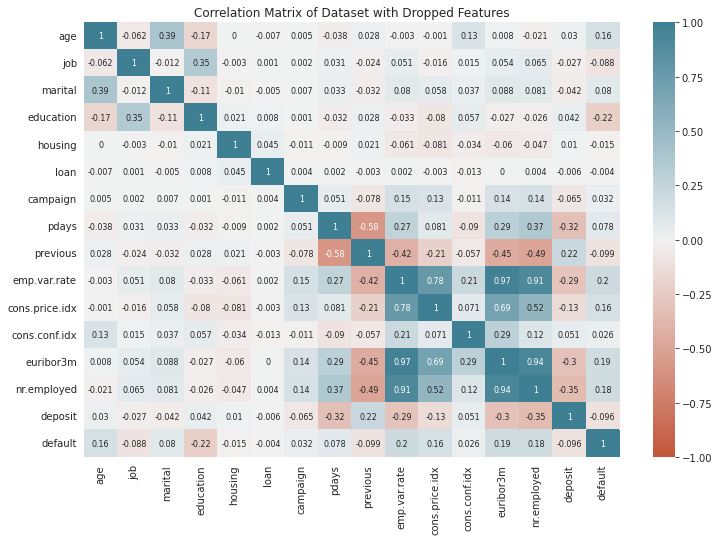

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(12,8))

sns.heatmap(df.corr().round(3), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 8})

_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=90, fontsize=10)

plt.title('Correlation Matrix of Dataset with Dropped Features')
plt.show()

Uncorrelated features that have no further use in the analysis are removed.

In [ ]:
df = df.drop(['housing', 'loan', 'campaign', 'poutcome', 'pdays', 'previous', 'deposit'], axis = 1)
print(df.shape)
df.head()

(38227, 10)


,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,12500,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,1
2,37,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0
3,40,17000,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0


## 2.4: Outliers

This subsection details the methods used to remove outliers

In [ ]:
df.describe().round(2)

,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
count,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.00,38227.0
mean,39.86,17520.71,0.83,2.99,0.08,93.57,-40.54,3.62,5167.43,0.2
std,10.29,5444.72,0.60,1.47,1.57,0.58,4.62,1.73,71.76,0.4
min,17.00,0.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.0
25%,32.00,14500.00,0.00,2.00,-1.80,93.08,-42.70,1.34,5099.10,0.0
50%,38.00,17000.00,1.00,3.00,1.10,93.44,-41.80,4.86,5191.00,0.0
75%,47.00,20000.00,1.00,4.00,1.40,93.99,-36.40,4.96,5228.10,0.0
max,98.00,28000.00,2.00,5.00,1.40,94.77,-26.90,5.04,5228.10,1.0


The dataset is normalised using z-score normalisation. Any features above or below 2 standard deviations are considered outliers and therefore removed. The outliers are stored in a separate dataset for later analysis. The resultant shape of the datasets is given below. The dataset with outliers removed is called df2.

In [ ]:
df2 = df[(abs(stats.zscore(df)) < 2).all(axis=1)]
df_outliers = df[~(abs(stats.zscore(df)) < 2).all(axis=1)]

In [ ]:
print('The processed dataframe with outliers removed:\n')
df2.head()

The processed dataframe with outliers removed:



,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
1,57,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,1
2,37,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0
3,40,17000,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,20000,1,3,1.1,93.994,-36.4,4.857,5191.0,0
5,45,20000,1,2,1.1,93.994,-36.4,4.857,5191.0,1


In [ ]:
print('A dataframe of outliers:\n')
df_outliers.head()

A dataframe of outliers:



,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
0,56,12500,1,0,1.1,93.994,-36.4,4.857,5191.0,0
13,57,12500,2,0,1.1,93.994,-36.4,4.857,5191.0,0
20,30,0,1,3,1.1,93.994,-36.4,4.857,5191.0,0
21,55,14500,1,0,1.1,93.994,-36.4,4.857,5191.0,1
33,54,28000,1,0,1.1,93.994,-36.4,4.857,5191.0,1


In [ ]:
print('df shape:', df.shape)   # Before outlier removal
print('df2 shape:', df2.shape)   # After outliers removed
print('df_outlier shape:', df_outliers.shape)   # Outlier dataframe

df shape: (38227, 10)
df2 shape: (29961, 10)
df_outlier shape: (8266, 10)


## 2.5: Outliers Analysis

Default ratios between the original, processed and outlier datasets are analysed. This will ensure that the outliers are not significant to the analysis.

In [ ]:
df0_default_yes = len(df0[df0['default']==1])   # n of original dataset defaulters
df0_default_no = len(df0[df0['default']==0])    # n of original dataset non-defaulters

df2_default_yes = len(df2[df2['default']==1])
df2_default_no = len(df2[df2['default']==0])

dfout_default_yes = len(df_outliers[df_outliers['default']==1])
dfout_default_no = len(df_outliers[df_outliers['default']==0])

df0_tot = len(df0)   # Length of original dataset
df2_tot = len(df2)   # Length of processed dataset
dfout_tot = len(df_outliers)   # Length of outlier dataset

In [ ]:
df0_default_ratio = df0_default_yes / df0_tot
df2_default_ratio = df2_default_yes / df2_tot
dfout_default_ratio = dfout_default_yes / dfout_tot

default_loss_ratio = df2_default_yes / df0_default_yes
total_loss_ratio = df2_tot / df0_tot

In [ ]:
print('Ratio of defaulters in origional dataset: ', round(df0_default_ratio*100, 2), '%')
print('Ratio of defaulters in processed dataset: ', round(df2_default_ratio*100, 2), '%')
print('Ratio of defaulters in the removed outliers: ', round(dfout_default_ratio*100, 2), '%')
print('We would expect the ratio of defaulters in the outlier df to be close to 50%, as shown.', '\n')

print('The percentage of defaulters removed due to outlier classification: ', round(100-default_loss_ratio*100, 2),'%')
print('The percentage of dataset removed due to outlier classification: ', round(100-total_loss_ratio*100, 2),'%', '\n')

print('The percentage of defaulter outliers removed compared to outliers of the whole dataset is very similar, suggesting the outliers have no baring')
print('Total number of outliers that have defaulted and are therefore removed: ', dfout_default_yes)
# 12.85, 10.42

Ratio of defaulters in origional dataset:  20.88 %
Ratio of defaulters in processed dataset:  19.68 %
Ratio of defaulters in the removed outliers:  22.48 %
We would expect the ratio of defaulters in the outlier df to be close to 50%, as shown. 

The percentage of defaulters removed due to outlier classification:  31.45 %
The percentage of dataset removed due to outlier classification:  27.26 % 

The percentage of defaulter outliers removed compared to outliers of the whole dataset is very similar, suggesting the outliers have no baring
Total number of outliers that have defaulted and are therefore removed:  1858


Around 1/3 of the labels are removed. This is undesirable however has little effect on the resulting accuracy of the algorithm.

## 2.6: Reducing Population Bias

In order to reduce algorithmic bias, the number of defaulters is equated to the number of non-defaulters. This ensures the model is not over-trained on a single population.

In [ ]:
df_def = df2[df2['default']==1]
df_no_def = df2[df2['default']==0]
print(df_def.shape)
print(df_no_def.shape)

(5895, 10)
(24066, 10)


For the purpose of this analysis, a repeatable dataframe is created (for re-running the IDE). In practice, the random sample dataframe should be used.

In [ ]:
n_pop = len(df_def)

df_samp_random = df_no_def.sample(n=n_pop)
df_samp_repeat = df_no_def.iloc[:n_pop, :]

The default dataset and repeatable dataset are concatenated. The resultant processed dataset is then shuffled to randomise order of rows. The final dataset (df2) is fully processed and ready to be inputted to the model.

In [ ]:
df2 = pd.concat([df_def, df_samp_repeat], axis=0)
df2 = df2.sample(frac = 1)
print(df2.shape)
df2.head()

(11790, 10)


,age,job,marital,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default
488,45,12500,1,5,1.1,93.994,-36.4,4.857,5191.0,1
31282,51,14500,1,2,-1.8,92.893,-46.2,1.334,5099.1,1
1981,52,24000,1,4,1.1,93.994,-36.4,4.855,5191.0,0
4269,42,24000,2,4,1.1,93.994,-36.4,4.856,5191.0,0
6766,35,14500,1,2,1.1,93.994,-36.4,4.857,5191.0,0


# Section 3: Analysis Visualisation

## 3.1: Categorical Data

The categorical data is explored using count plots.

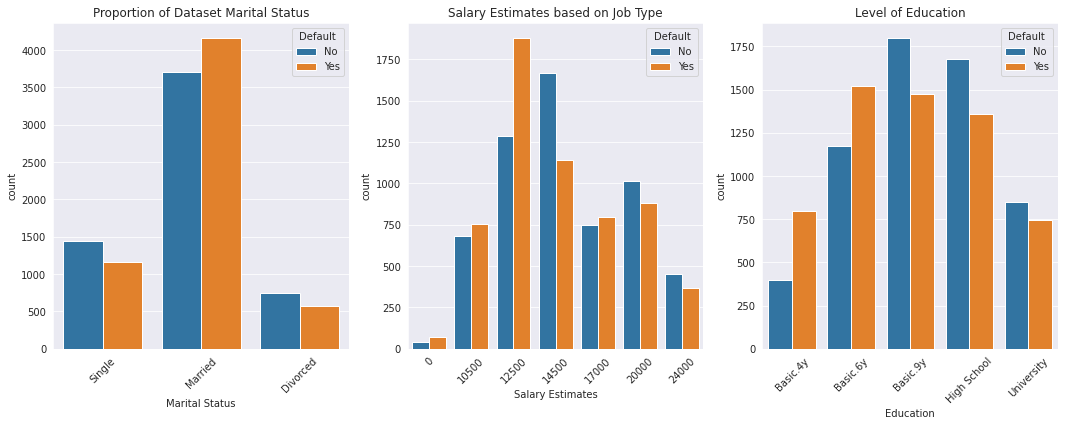

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

g2 = sns.countplot(x='marital', data=df2, hue='default', ax=axes[0])
g2.set_xticklabels(['Single', 'Married', 'Divorced'])
g2.set_xlabel('Marital Status')
axes[0].set_title('Proportion of Dataset Marital Status')
axes[0].tick_params('x', labelrotation=45)
axes[0].legend(labels=["No","Yes"], title = "Default")

g3 = sns.countplot(x='job',data=df2, hue='default', ax=axes[1])
g3.set_xticklabels(['0', '10500', '12500', '14500', '17000', '20000', '24000', '28000'])
g3.set_xlabel('Salary Estimates')
axes[1].set_title('Salary Estimates based on Job Type')
axes[1].tick_params('x', labelrotation=45)
axes[1].legend(labels=["No","Yes"], title = "Default")

g4 = sns.countplot(x='education',data=df2, hue='default', ax=axes[2])
g4.set_xticklabels(['Basic.4y', 'Basic.6y', 'Basic.9y', 'High School', 'University', 'Professional Course'])
g4.set_xlabel('Education')
axes[2].set_title('Level of Education')
axes[2].tick_params('x', labelrotation=45)
axes[2].legend(labels=["No","Yes"], title = "Default")

plt.show()

## 3.2: Age Distributions

The age ranges of the original and processed datasets are found.

In [ ]:
max_age0 = df0['age'].unique()
max_age2 = df2['age'].unique()

min_ages = df0['age'].min()
max_ages = min_ages + len(max_age2)
new_age_range = range(min_ages, max_ages)

print('The age ranged from', min_ages, 'to', df0['age'].max(),'for the origional dataset')
print('The age ranges from', min_ages, 'to', max_ages,'for the processed dataset')

The age ranged from 17 to 98 for the origional dataset
The age ranges from 17 to 58 for the processed dataset


Ratio of defaulters per given age range is explored for the processed dataset.

In [ ]:
age_lt_34 = df2[df2['age']<34]     # Dataset of customers gt or lt age
age_gt_40 = df2[df2['age']>40]     # lt = less than,  gt = greater than

n_age_lt_34 = len(df2[df2['age']<34])     # Length of each dataset
n_age_gt_40 = len(df2[df2['age']>40])

age_34_0 = len(age_lt_34[age_lt_34['default']==0])
age_34_1 = len(age_lt_34[age_lt_34['default']==1])

age_40_0 = len(age_gt_40[age_gt_40['default']==0])
age_40_1 = len(age_gt_40[age_gt_40['default']==1])

ratio_lt_34 = age_34_1 / n_age_lt_34
ratio_gt_40 = age_40_1 / n_age_gt_40

print('The ratio of defaulters aged less than 34 is: ', round(ratio_lt_34*100, 2), '%')
print('The ratio of defaulters aged greater than 40 is: ', round(ratio_gt_40*100, 2), '%')

The ratio of defaulters aged less than 34 is:  38.26 %
The ratio of defaulters aged greater than 40 is:  59.94 %


Distribution for ages in processed dataset. This gives an idea of under represented groups.

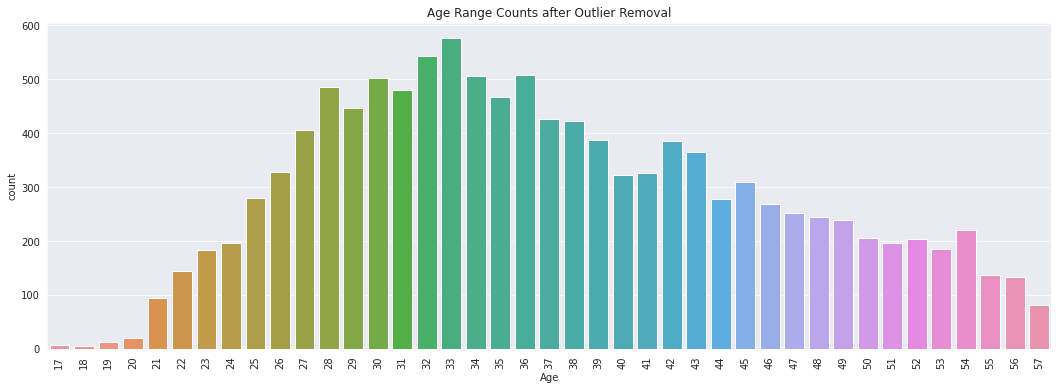

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(18,6))

age = sns.countplot(x='age',data=df2)

plt.title('Age Range Counts after Outlier Removal')
plt.xticks(rotation=90)
age.set_xticklabels(new_age_range)
ax.set_xlabel('Age')
plt.show()

Default rates per age is explored visually using count plot.

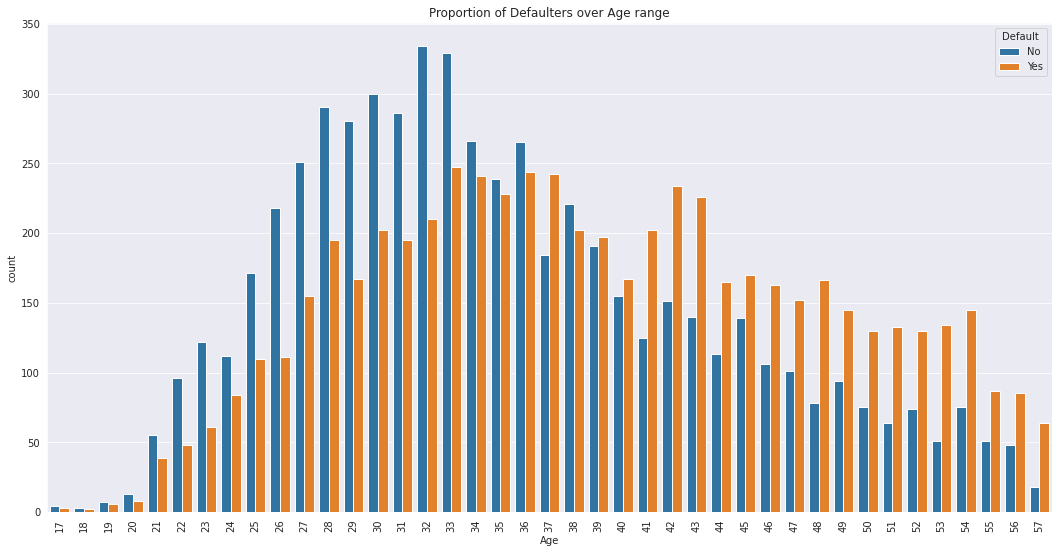

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(18,9))

age2 = sns.countplot(x='age', data=df2, hue='default')

plt.legend(labels=["No","Yes"], title = "Default")
plt.title('Proportion of Defaulters over Age range')
plt.xticks(rotation=90)
age2.set_xticklabels(new_age_range)
ax.set_xlabel('Age')
plt.show()

## 3.3: Processed Data Correlations

Finally, a correlation matrix is generated for the processed dataset. This visualises features of importance for model decision making.

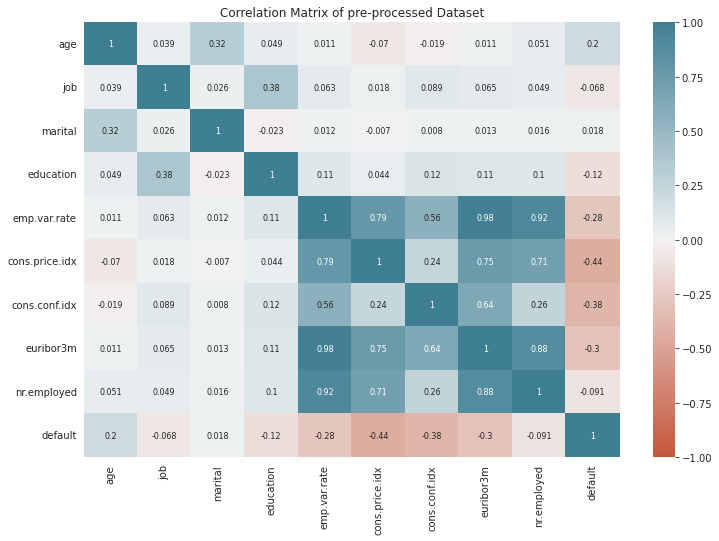

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(12,8))

sns.heatmap(df2.corr().round(3), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 8})

_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=90, fontsize=10)

plt.title('Correlation Matrix of pre-processed Dataset')
plt.show()

Magnitude of correlations for continuous features are visualised.

In [ ]:
cor1 = df2.corr()
cor1 = cor1[['default']].iloc[:-1,:]
cor1 = cor1.sort_values(by='default', ascending=False)

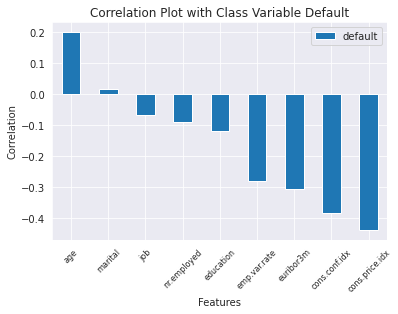

In [ ]:
cor1.plot.bar()
plt.xlabel("Features", fontsize=10)
plt.ylabel("Correlation", fontsize=10)
plt.xticks(fontsize=8, rotation=45)
plt.title('Correlation Plot with Class Variable Default')

plt.show()

# Section 4: Splitting the Dataset

The labels are dropped and the remaining dataset is split between training and test set (80/20 split respectively).

In [ ]:
X = df2.drop('default',axis = 1).values
y = df2['default'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

The shapes of the datasets are shown.

In [ ]:
print(df2.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(11790, 10)
(11790, 9)
(9432, 9)
(2358, 9)


# Section 5: Model Training and Validation

## 5.1: Normalisation

The split datasets are normalised using the standard scaler method.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

## 5.2: Principle Component Analysis

Principle Component Analysis (PCA) is used to reduce dimensionality of data.

In [ ]:
pca = PCA(n_components=9)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

Models are built using various classifiers.

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

## 5.3: Results of Various Models

The models are executed. Results for each model and their corresponding names are stored.

In [ ]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=9)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)
    
    # XGB: 0.8007845631891434 @ <2
    # XGB: 0.7960308590492077 @ <3

LR: 0.7924088210347753
LDA: 0.7860474978795589
KNN: 0.7878498727735369
Decison-Tree: 0.7766115351993216
RandForest: 0.8019508057675996
SVM: 0.7918787107718406
XGB: 0.7968617472434266


# Section 6: Testing the Final Model

The model is now tested on the test dataset using the XGB classifier. The same steps outlined above are conducted.

In [ ]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [ ]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
predictions_xgb = xgb.predict(X_test)

## 6.1: Model Metrics

The accuracy for the test model is generated.

In [ ]:
accuracy = accuracy_score(Y_test, predictions_xgb)

The classification metric report is generated and stored in a dataframe.

In [ ]:
class_rep_t = classification_report(Y_test, predictions_xgb, output_dict=True)
df_cr = pd.DataFrame(class_rep_t)
df_cr = df_cr.T

df_cr = df_cr.drop(labels='accuracy', axis=0)
acc_df = pd.DataFrame([['', '', '0.79', '2358.0']], index=['accuracy'], columns=['precision', 'recall', 'f1-score', 'support'])

df_cr = df_cr.rename({ '0' : "Default" ,
                       '1' : 'Non Default'}, axis=0)

crf = df_cr.round(2)
crf = pd.concat([crf, acc_df])

A confusion matrix is generated and stored in a dataframe.

In [ ]:
labels = ['Default','Non Default']
df_heatmap2 = pd.DataFrame(confusion_matrix(Y_test, predictions_xgb), index=labels, columns=labels)

The accuracy, metrics and confusion matrix of the model are shown.

Accuracy :  0.7900763358778626 

Classification Report:


,precision,recall,f1-score,support
Default,0.72,0.96,0.82,1190.0
Non Default,0.94,0.62,0.74,1168.0
macro avg,0.83,0.79,0.78,2358.0
weighted avg,0.83,0.79,0.78,2358.0
accuracy,,,0.79,2358.0



 Confusion Matrix:


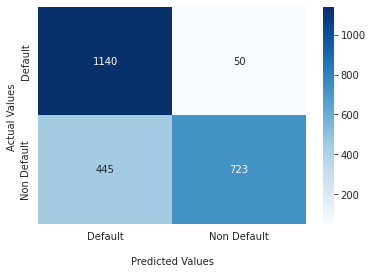

In [ ]:
print("Accuracy : ", accuracy,'\n')

print('Classification Report:')
display(crf)

print('\n', 'Confusion Matrix:')
heatmap = sns.heatmap(df_heatmap2, annot=True, fmt="d", cmap='Blues')
heatmap.set_xlabel('\nPredicted Values')
heatmap.set_ylabel('Actual Values ')
plt.show()

Traning and test accuracies are very close, suggesting no over/underfitting.